In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [35]:
data=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [36]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
data.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
5.4           3.4          1.7           0.2          Iris-setosa        1
5.5           2.5          4.0           1.3          Iris-versicolor    1
              2.4          3.8           1.1          Iris-versicolor    1
                                                                        ..
6.3           2.5          4.9           1.5          Iris-versicolor    1
              2.3          4.4           1.3          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
              2.9          4.3           1.3          Iris-versicolor    1
4.3           3.0          1.1           0.1          Iris-setosa        1
Length: 147, dtype: int64

In [40]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

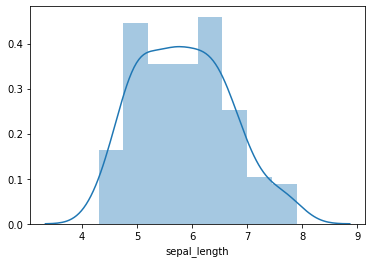

In [41]:
sns.distplot(data['sepal_length'])

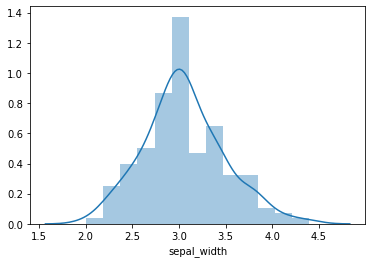

In [42]:
sns.distplot(data['sepal_width'])

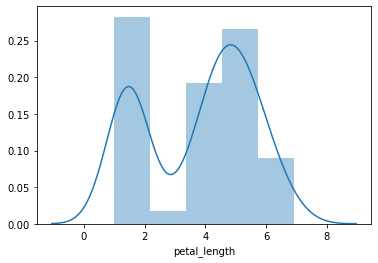

In [43]:
sns.distplot(data['petal_length'])

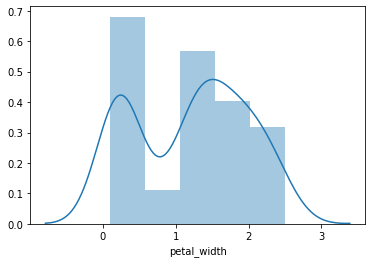

In [44]:
sns.distplot(data['petal_width'])

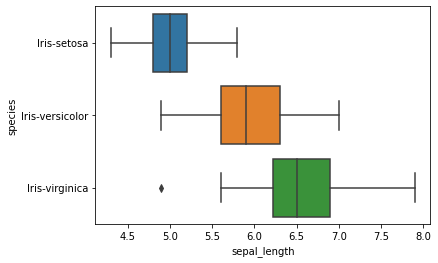

In [45]:
sns.boxplot(x=data['sepal_length'],y=data['species'])

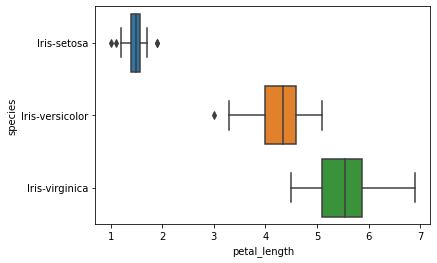

In [47]:
sns.boxplot(x=data['petal_length'],y=data['species'])

In [ ]:
from sklearn.preprocessing import PowerTransformer

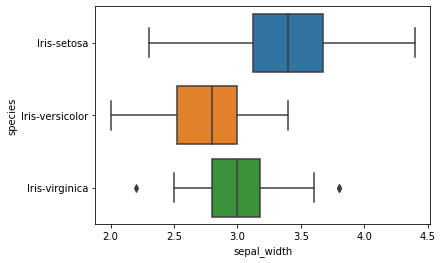

In [48]:
sns.boxplot(x=data['sepal_width'],y=data['species'])

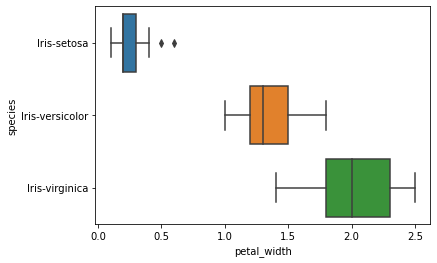

In [49]:
sns.boxplot(x=data['petal_width'],y=data['species'])

In [50]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [51]:
data.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [52]:
y=data['species']
data.drop('species',axis=1,inplace=True)
x=data

In [53]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [54]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
x.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
std=StandardScaler()
x=std.fit_transform(x)

In [73]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.7,stratify=y,random_state=0)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_x.shape)

(105, 4)
(105,)
(45, 4)
(45, 4)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [79]:
lr=LogisticRegression()
lr.fit(train_x,train_y)
y_pred=lr.predict(test_x)

In [80]:
print("acuracy : ",accuracy_score(test_y,y_pred))

acuracy :  0.9777777777777777
